### W11D1 - Pratica

#### Encoding esempio
000 a                                                                                                                                    
001 b                                                                                                                                    
010 c                                                                                                                                    
100 d                                                                                                                                    
101 e                                                                                                                                    
110 f                                                                                                                                    
111 g                                                                                                                                    
                                                                                                                                         
010000100101 cade                                                                                                                        
                                                                                                                                         
111 c                                                                                                                                    
011 a                                                                                                                                    
100 d                                                                                                                                    
110 e                                                                                                                                    
                                                                                                                                         
111011100110 cade

#### Esercizio 1: 
Esaminiamo il dataset della mappa dei pub, circoli e locali in Italia.

In [1]:
import pandas as pd                           
pub = pd.read_csv("Datasets/opendata/Mappa-dei-pub-circoli-locali-in-Italia.csv", encoding="latin1", sep=";")
display(pub)

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
0,ALTRO,ALTRO,ALTRO,NaN,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,ALA DI STURA,CITTA' METROPOLITANA DI TORINO,Piemonte,NaN,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150
...,...,...,...,...,...,...,...,...,...
2630,BARLETTA,BARLETTA-ANDRIA-TRANI,Puglia,Santa Croce,2010,2010-01-17T16:15:08Z,615632993,16.285782,41.320671
2631,BISCEGLIE,BARLETTA-ANDRIA-TRANI,Puglia,Auld Dublin,2014,2014-03-03T20:56:16Z,2613737619,16.497204,41.241814
2632,BISCEGLIE,BARLETTA-ANDRIA-TRANI,Puglia,Ferus,2014,2014-01-07T19:22:18Z,2613737620,16.506175,41.240957
2633,TRANI,BARLETTA-ANDRIA-TRANI,Puglia,Re Artù,2009,2009-09-04T07:57:05Z,482836935,16.418124,41.281518


* Quanti dati ci sono in totale?

In [2]:
print("Dimensione del dataset:", pub.shape)

Dimensione del dataset: (2635, 9)


* Quali sono i metadati?

In [3]:
print("Metadati (colonne del dataset):")
print(pub.columns.tolist())
#.tolist() -> utilizzato per convertire una colonna o una Serie in una lista Python

Metadati (colonne del dataset):
['Comune', 'Provincia', 'Regione', 'Nome', 'Anno inserimento', 'Data e ora inserimento', 'Identificatore in OpenStreetMap', 'Longitudine', 'Latitudine']


* Stampiamo il primo elemento.
* Stampiamo l'ultimo elemento.
* Riusciamo a stampare un elemento a caso?

In [4]:
#Stampo primo elemento
print("Primo elemento:")
display(pub.head(1))

#Stampo ultimo elemento
print("\nUltimo elemento:")
display(pub.tail(1))

#Stampo elemento a caso
print("\nElemento casuale:")
display(pub.sample(1))

Primo elemento:


,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
0,ALTRO,ALTRO,ALTRO,NaN,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583



Ultimo elemento:


,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
2634,TRANI,BARLETTA-ANDRIA-TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264



Elemento casuale:


,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
65,TORINO,CITTA' METROPOLITANA DI TORINO,Piemonte,Fluido,2011,2011-11-02T13:13:24Z,1328570155,7.690774,45.057565


* Quali sono gli anni di inserimento presenti?

In [5]:
#Seleziono anni univoci dalla colonna 'Anno inserimento', li ordino e li converto in lista
anni = sorted(pub.loc[:, "Anno inserimento"].unique().tolist())

#Stampo anni inserimento presenti
print("Anni di inserimento presenti:", anni)

Anni di inserimento presenti: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [6]:
#Con costrutto if-else

#Verifico se colonna 'Anno inserimento' esiste
if 'Anno inserimento' in pub.columns:
    #Prendo anni univoci colonna 'Anno inserimento'
    anni = pub['Anno inserimento'].unique()
    
    #Stampo anni inserimento ordinati
    print("Anni di inserimento presenti:")
    print(sorted(anni))
else:
    #Messaggio se colonna 'Anno inserimento' manca
    print("Colonna 'Anno inserimento' non trovata nel dataset.")

Anni di inserimento presenti:
[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


* Quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46?

In [7]:
#Filtro attività con 'longitudine' tra 9 e 10 e 'latitudine' tra 45 e 46
attivita_quadrato = pub[(pub['Longitudine'] >= 9) & (pub['Longitudine'] <= 10) & 
                        (pub['Latitudine'] >= 45) & (pub['Latitudine'] <= 46)]

#Stampo numero attività che soddisfano filtro
print(f"Numero di attività nel quadrato specificato: {len(attivita_quadrato)}")

Numero di attività nel quadrato specificato: 306


* Quante attività ci sono nella provincia di Vicenza?

In [8]:
#Creo filtro per selezionare righe, in cui colonna 'Provincia' = 'VICENZA'
filtro_vic = pub["Provincia"] == "VICENZA"

#Stampo numero attività nella provincia 'Vicenza'
print("Numero di attività nella provincia di Vicenza:", len(pub.loc[filtro_vic]))

Numero di attività nella provincia di Vicenza: 73


In [9]:
#Con costrutto if-else

#Verifico se colonna 'Provincia' esiste
if 'Provincia' in pub.columns:
    #Filtro righe in cui colonna 'Provincia' contiene 'Vicenza'
    vicenza = pub[pub['Provincia'].str.contains("Vicenza", case=False, na=False)]
    
    #Stampo numero attività trovate nella provincia 'Vicenza'
    print(f"Numero di attività nella provincia di Vicenza: {len(vicenza)}")
else:
    #Messaggio se colonna 'Provincia' manca
    print("Colonna 'Provincia' non trovata nel dataset.")

Numero di attività nella provincia di Vicenza: 73


* Quante attività ci sono in Lazio e Abruzzo assieme?

In [10]:
#Filtro per regioni 'Lazio' e 'Abruzzo'
filtro_lazio = pub['Regione'] == "Lazio"
filtro_abruzzo = pub['Regione'] == "Abruzzo"

#Combino filtri con OR (|) 
lazio_abruzzo = pub[filtro_lazio | filtro_abruzzo]

#Stampo numero attività
print(f"Numero di attività in Lazio e Abruzzo: {len(lazio_abruzzo)}")

Numero di attività in Lazio e Abruzzo: 337


In [11]:
#Con costrutto if-else

#Verifico se colonna 'Regione' esiste nel DataFrame
if 'Regione' in pub.columns:
    #Filtro righe in cui colonna 'Regione' contiene 'Lazio' o 'Abruzzo'
    lazio_abruzzo = pub[pub['Regione'].str.contains("Lazio|Abruzzo", case=False, na=False)]
    #Stampo numero attività trovate nelle regioni 'Lazio' e 'Abruzzo'
    print(f"Numero di attività in Lazio e Abruzzo: {len(lazio_abruzzo)}")
else:
    #Messaggio errore se colonna 'Regione' non è presente nel DataFrame
    print("Colonna 'Regione' non trovata nel dataset.")

Numero di attività in Lazio e Abruzzo: 337


* Quante enoteche ci sono, e come si chiamano?

In [12]:
enoteche = []                                       #Lista per raccogliere nomi enoteche

for nome in pub["Nome"]:                            #Itero su ogni nome nella colonna 'Nome'
    if type(nome) != float:                         #Controllo se il nome esiste (non è NaN)
        nome_min = nome.lower()                     #Converto nome in minuscolo
        if "enoteca" in nome_min:                   #Verifico se 'enoteca' è nel nome
            enoteche.append(nome)                   #Aggiungo nome alla lista

print("Numero di enoteche:", len(enoteche), "\n")   #Stampo numero totale enoteche
print("Nomi delle enoteche:")                       #Stampo nomi enoteche, uno per riga
for nome in enoteche:
    print(nome)

Numero di enoteche: 6 

Nomi delle enoteche:
Enoteca con Cucina""Tirolin""
Concordia Enoteca
Enoteca Umberto
Enoteca ""Al Brindisi""
Enoteca ""da Massimo""
Enoteca Il Violino Rosso


In [13]:
#Con costrutto if-else

#Verifico se colonna 'Nome' esiste
if 'Nome' in pub.columns:
    #Filtro righe con 'enoteca', ignorando maiuscole/minuscole
    enoteche = pub[pub['Nome'].str.contains("enoteca", case=False, na=False)]
    
    #Stampo numero enoteche
    print(f"Numero di enoteche: {len(enoteche)}\n")
    
    #Stampo nomi enoteche
    print("Nomi delle enoteche:")
    for nome in enoteche['Nome'].tolist():
        print(nome)
else:
    #Messaggio se colonna 'Nome' manca
    print("Colonne 'Nome' non trovate nel dataset.")

Numero di enoteche: 6

Nomi delle enoteche:
Enoteca con Cucina""Tirolin""
Concordia Enoteca
Enoteca Umberto
Enoteca ""Al Brindisi""
Enoteca ""da Massimo""
Enoteca Il Violino Rosso


* **Gestione dei valori nulli**: La funzione **.fillna("")** sostituisce i valori NaN, con stringhe vuote per evitare errori durante le operazioni successive;
* **Trasformazione dei dati**: La funzione **.str.lower()** converte i valori in minuscolo, rendendo il filtro case-insensitive;
* **Ricerca della stringa**: La funzione **.str.contains("enoteca")** controlla se la stringa "enoteca" è contenuta nei valori della colonna specifica.

In [14]:
filtro = pub["Nome"].fillna("")           #Sostituisco valori nulli nella colonna 'Nome' con stringhe vuote, per evitare errori
filtro = filtro.str.lower()               #Converto tutto testo in minuscolo, per una ricerca case-insensitive
filtro = filtro.str.contains("enoteca")   #Controllo se la stringa 'enoteca' è presente nei valori
#Posso mettere tutto su una riga, con metodi in cascata -> filtro = pub["Nome"].fillna("").str.lower().str.contains("enoteca")

#Visualizzo righe DataFrame che soddisfano filtro
display(pub.loc[filtro])

,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
64,TORINO,CITTA' METROPOLITANA DI TORINO,Piemonte,"Enoteca con Cucina""""Tirolin""""",2012,2012-01-24T14:30:04Z,1603586163,7.713993,45.065174
496,MILANO,CITTA' METROPOLITANA DI MILANO,Lombardia,Concordia Enoteca,2014,2014-04-01T11:15:38Z,2758108717,9.171033,45.450819
1003,MALO,VICENZA,Veneto,Enoteca Umberto,2013,2013-04-15T08:41:22Z,1659350138,11.418507,45.653453
1491,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"Al Brindisi""""",2015,2015-03-31T17:33:38Z,1249699754,11.620326,44.835890
1492,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"da Massimo""""",2015,2015-03-31T17:33:38Z,1249701207,11.619559,44.834824
1723,CASCIANA TERME LARI,PISA,Toscana,Enoteca Il Violino Rosso,2015,2015-08-20T13:12:56Z,3706561154,10.591535,43.566210


* **Dimensioni DataFrame**: Il metodo **.shape()** restituisce una *tupla* che descrive dimensione DataFrame -> questo permette di conoscere quante righe e colonne ci sono prima e dopo qualsiasi modifica.
* **Rimuovere righe con valori nulli**: Il metodo **.dropna()** viene utilizzato per eliminare i valori mancanti, che sono rappresentati da NaN (Not a Number) in un DataFrame -> utile quando ci si vuole assicurare che i dati analizzati siano completi e privi di valori nulli, che potrebbero causare errori o incoerenze. Questo assicura che le analisi siano condotte su dati completi.
* **Modificare formato lettere**: Il metodo **.str.lower()** viene utilizzato per trasformare tutte le lettere di una stringa in minuscolo -> così confrontare "Enoteca" e "enoteca" diventa semplice, poiché entrambi saranno convertiti in "enoteca". La ricerca è case-insensitive.
* **Filtrare le righe contenenti "enoteca"**: Il metodo **.str.contains()** viene utilizzato per verificare se una determinata stringa è presente all'interno di un'altra stringa nei dati di un DataFrame o Series -> particolarmente utile per filtrare i dati, basandosi su parole chiave o criteri testuali.

In [15]:
print(pub.shape)                                          #Stampo dimensione originale DataFrame
pub = pub.dropna(subset="Nome")                           #Rimuovo righe con valori nulli nella colonna 'Nome'
print(pub.shape)                                          #Stampo dimensione DataFrame, dopo la rimozione
filtro = pub["Nome"].str.lower().str.contains("enoteca")  #Filtro righe che contengono 'enoteca' (case-insensitive)
display(pub.loc[filtro])                                  #Mostro righe filtrate

(2635, 9)
(2337, 9)


,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
64,TORINO,CITTA' METROPOLITANA DI TORINO,Piemonte,"Enoteca con Cucina""""Tirolin""""",2012,2012-01-24T14:30:04Z,1603586163,7.713993,45.065174
496,MILANO,CITTA' METROPOLITANA DI MILANO,Lombardia,Concordia Enoteca,2014,2014-04-01T11:15:38Z,2758108717,9.171033,45.450819
1003,MALO,VICENZA,Veneto,Enoteca Umberto,2013,2013-04-15T08:41:22Z,1659350138,11.418507,45.653453
1491,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"Al Brindisi""""",2015,2015-03-31T17:33:38Z,1249699754,11.620326,44.835890
1492,FERRARA,FERRARA,Emilia-Romagna,"Enoteca """"da Massimo""""",2015,2015-03-31T17:33:38Z,1249701207,11.619559,44.834824
1723,CASCIANA TERME LARI,PISA,Toscana,Enoteca Il Violino Rosso,2015,2015-08-20T13:12:56Z,3706561154,10.591535,43.566210


#### Esercizio 2: 
Il dataset insurance.csv contiene dati rispetto a caratteristiche e abitudini delle persone, e della zona in cui vivono, rispetto ai costi individuali per le cure mediche, come premio per le assicurazioni sulla salute. 

In [16]:
ins = pd.read_csv("Datasets/beginner_datasets/insurance.csv")

* Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna.

In [17]:
print("Dimensione del dataset:")   #Stampo intestazione
print(ins.shape, "\n")             #Dimensioni dataset
display(ins)                       #Visualizzo anteprima

print("Nomi delle colonne:")       #Stampo intestazione
print(ins.columns.tolist())        #Lista nomi colonne

Dimensione del dataset:
(1338, 7) 



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Nomi delle colonne:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


* Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
  * In base alla visualizzazione non ci sono differenze significative.

In [18]:
print(ins.groupby("region")["charges"].mean().round(2))

region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64


* E rispetto a smoker? E a sex?
  * In base alla visualizzazione ci sono differenze significative solo per gli smoker: sono nettamente di più i fumatori.

In [19]:
print(ins.groupby("smoker")["charges"].mean().round(2), "\n")
print(ins.groupby("sex")["charges"].mean().round(2))

smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64 

sex
female    12569.58
male      13956.75
Name: charges, dtype: float64


#### *Esempio raggruppamento nitificato (o gerarchico) e metodo .xs()*

In [20]:
#Raggruppamento nitificato o gerarchico
analisi = ins.groupby(["region", "smoker", "sex"])["charges"].mean().round(2).to_frame()
display(analisi)

charges
region    smoker sex             
northeast no     female   9640.43
                 male     8664.04
          yes    female  28032.05
                 male    30926.25
northwest no     female   8787.00
                 male     8320.69
          yes    female  29670.82
                 male    30713.18
southeast no     female   8440.21
                 male     7609.00
          yes    female  33034.82
                 male    36029.84
southwest no     female   8234.09
                 male     7778.91
          yes    female  31687.99
                 male    32598.86

> * **.xs()**: Metodo che viene utilizzato per selezionare i dati in modo rapido e specifico da un DataFrame che ha un indice gerarchico (MultiIndex). Permette di accedere direttamente a un livello dell'indice o di filtrare dati specifici.

In [21]:
display(analisi.xs("northeast"))                    #Visualizzo dati filtrati per la regione 'northeast'

charges
smoker sex             
no     female   9640.43
       male     8664.04
yes    female  28032.05
       male    30926.25

In [22]:
print(analisi.loc[("northeast", "yes", "female")])   #Se voglio riga specifica, devo passare tutti i livelli

charges    28032.05
Name: (northeast, yes, female), dtype: float64


* Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?

In [23]:
#Calcolo descrittori statistici (media, std, min, max, ecc.) per colonna 'bmi'
print("Descrittori statistici di bmi:")
display(ins["bmi"].describe().round(2).to_frame())     

print("\n")

#Minimo, media e massimo di 'charges', rispetto ai quartili di 'bmi'
print("Minimo, media e massimo di charges, rispetto ai quartili di bmi:")
nomi_quartili = ["q1", "q2", "q3", "q4"]
ins["qbmi"] = pd.qcut(ins["bmi"], 4, labels=nomi_quartili).astype(str)      #Divido 'bmi' in quartili, con nomi quartili
#.qcut() -> funzione che divide una serie numerica in quartili/intervalli di dimensioni uguali, basati sui quantili.
#.astype(str) -> utilizzato per convertire i valori di una colonna o di un intero DataFrame in stringhe.

display(ins.groupby("qbmi")["charges"].agg(["min", "mean", "max"]))         #Calcolo min, media, max          

Descrittori statistici di bmi:


,bmi
count,1338.00
mean,30.66
std,6.10
min,15.96
25%,26.30
50%,30.40
75%,34.69
max,53.13




Minimo, media e massimo di charges, rispetto ai quartili di bmi:


,min,mean,max
qbmi,,,
q1,1121.8739,10360.662825,38245.59327
q2,1131.5066,11407.831468,62592.87309
q3,1135.9407,14358.173081,60021.39897
q4,1141.4451,16987.936691,63770.42801


#### Esercizio 3: 
Carichiamo in un DataFrame il dataset iris.csv.

In [24]:
iris = pd.read_csv("Datasets/beginner_datasets/iris.csv")
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* Calcoliamo la media della lunghezza dei petali di tutto il dataset.

In [25]:
print("La lunghezza dei petali è:", iris["petal_length"].mean().round(2))

La lunghezza dei petali è: 3.76


* Calcoliamo la media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby().

In [26]:
print("La media della lunghezza dei petali per ogni specie di Iris è:")
display(iris.groupby("species")["petal_length"].mean().round(2).to_frame())

La media della lunghezza dei petali per ogni specie di Iris è:


,petal_length
species,
Iris-setosa,1.46
Iris-versicolor,4.26
Iris-virginica,5.55


* Calcoliamo media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg().

In [27]:
display(iris.groupby("species")["sepal_width"].agg(["min", "mean", "max"]).round(2))

,min,mean,max
species,,,
Iris-setosa,2.3,3.42,4.4
Iris-versicolor,2.0,2.77,3.4
Iris-virginica,2.2,2.97,3.8


#### Esercizio 4:  
Il dataset wine.csv contiene delle analisi organolettiche su diverse qualità di vini.

In [28]:
wine = pd.read_csv("Datasets/beginner_datasets/wine.csv")
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


* Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale?
  * Sì, ci sono differenze significative. La concentrazione alcolica tende ad aumentare all'aumentare della qualità del vino. Ad esempio, i vini di qualità più bassa (3, 4 e 5) hanno concentrazioni alcoliche medie inferiori rispetto ai vini di qualità più alta (8 e 9).
  * La media totale della concentrazione alcolica, calcolata nel DataFrame, è 10.49. Se confrontiamo i dati:
    * Le qualità 6, 7, 8 e 9 superano la media totale;
    * Le qualità 3, 4 e 5 sono al di sotto della media totale.

In [29]:
print("La media totale della concentrazione alcolica è", wine["alcohol"].mean().round(2)) #Media totale del DataFrame
display(wine.groupby("quality")["alcohol"].mean().round(2).to_frame())                    #Media concentrazione alcolica per ogni qualità

La media totale della concentrazione alcolica è 10.49


,alcohol
quality,
3,10.22
4,10.18
5,9.84
6,10.59
7,11.39
8,11.68
9,12.18


* C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi?
  * Sì, c'è una differenza nella concentrazione alcolica tra i due tipi di vino. Anche se non è molto marcata, i vini bianchi tendono ad avere una concentrazione alcolica media leggermente superiore, rispetto ai vini rossi.

In [30]:
display(wine.groupby("type")["alcohol"].mean().round(2).to_frame())    #Media concentrazione alcolica per tipologia vino

,alcohol
type,
red,10.42
white,10.51


>* Raggruppo i dati per qualità e tipologia di vino.

In [31]:
display(wine.groupby(["quality", "type"])["type"].size().to_frame())   #Conto le occorrenze e le converto in un DataFrame
#.size() -> utilizzato per contare il numero di elementi in ogni gruppo, quando viene applicato dopo un .groupby()

type
quality type       
3       red      10
        white    20
4       red      53
        white   163
5       red     681
        white  1457
6       red     638
        white  2198
7       red     199
        white   880
8       red      18
        white   175
9       white     5

* Rifacendo le analisi dei due punti precedenti ma per il pH, cambia qualcosa?
  * Sì, i vini rossi hanno un pH medio di 3.31, mentre i vini bianchi hanno un pH medio di 3.19. Questo indica che i vini rossi tendono ad essere leggermente più alcalini, rispetto ai vini bianchi.

In [32]:
print("La media totale del pH è", wine["pH"].mean().round(2))          #Media totale PH del DataFrame
display(wine.groupby("quality")["pH"].mean().round(2).to_frame())      #Media PH per ogni qualità
display(wine.groupby("type")["pH"].mean().round(2).to_frame())         #Media PH per tipologia vino

La media totale del pH è 3.22


,pH
quality,
3,3.26
4,3.23
5,3.21
6,3.22
7,3.23
8,3.22
9,3.31


,pH
type,
red,3.31
white,3.19


* E per i solfati?
  * Sì, esiste una differenza significativa: i vini rossi hanno un livello medio di solfati più alto rispetto ai vini bianchi. 

In [33]:
print("La media totale dei solfati è", wine["sulphates"].mean().round(2))  #Media totale solfati del DataFrame
display(wine.groupby("quality")["sulphates"].mean().round(2).to_frame())   #Media solfati per ogni qualità
display(wine.groupby("type")["sulphates"].mean().round(2).to_frame())      #Media solfati per tipologia vino

La media totale dei solfati è 0.53


,sulphates
quality,
3,0.51
4,0.51
5,0.53
6,0.53
7,0.55
8,0.51
9,0.47


,sulphates
type,
red,0.66
white,0.49


#### Esercizio 5:  
Il file boston.csv contiene il Boston Housing Dataset, che deriva dalle informazioni raccolte dal Census Service degli Stati Uniti sulle abitazioni nell'area di Boston. Di seguito vengono descritte le colonne del dataset: 
* CRIM - tasso di criminalità pro capite per città.
* ZN - proporzione di terreni residenziali suddivisi in zone per lotti superiori a 25.000 piedi quadrati.
* INDUS - percentuale di acri di attività commerciali non al dettaglio per città.
* CHAS - variabile dummy del fiume Charles (1 se il tratto costeggia il fiume; 0 altrimenti).
* NOX - concentrazione di ossidi di azoto (parti per 10 milioni).
* RM - numero medio di stanze per abitazione.
* AGE - proporzione di unità abitative occupate da proprietari costruite prima del 1940.
* DIS - distanze ponderate da cinque centri occupazionali di Boston.
* RAD - indice di accessibilità alle autostrade radiali.
* TAX - aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari.
* PTRATIO - rapporto alunni-insegnanti per città.
* BLACK - la percentuale di neri per città.
* LSTAT - % di popolazione di condizione più bassa.
* MEDV - valore mediano delle case, espresso in migliaiadi dollari.

In [34]:
boston = pd.read_csv("Datasets/beginner_datasets/boston.csv")
display(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


* La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
  * Se le case sono più vicina al fiume, costano di più;
  * Se le case sono più lontana dal fiume, costano di meno.

In [35]:
print(boston['chas'].unique())           #colonna CHAS (categorica) - variabile dummy del fiume Charles (1 vicino fiume; 0 lontano fiume)
display(boston.groupby("chas")["medv"].mean().round(2).to_frame())

[0 1]


,medv
chas,
0,22.09
1,28.44


* Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato?
  * Con un tasso di criminalità molto basso, il prezzo delle case è molto alto;
  * Con un tasso di criminalità molto alto, il prezzo delle case è molto basso.

In [36]:
display(boston.groupby("crim")["medv"].mean().iloc[:20].to_frame())           #Primi 20 raggruppamenti
display(boston.groupby("crim")["medv"].mean().iloc[-20:].to_frame())          #Ultimi 20 raggruppamenti

,medv
crim,
0.00632,24.00
0.00906,32.20
0.01096,22.00
0.01301,32.70
0.01311,35.40
0.01360,18.90
0.01381,50.00
0.01432,31.60
0.01439,29.10


,medv
crim,
18.8110,17.9
19.6091,15.0
20.0849,8.8
20.7162,11.9
22.0511,10.5
22.5971,7.4
23.6482,13.1
24.3938,10.5
24.8017,8.3


* Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?
  * Minore è il rapporto alunni-insegnanti per città e maggiore è il numero di stanze medio;
  * Se il rapporto alunni-insegnanti per città è basso, ci sono allora tanti insegnanti per pochi alunni.

>Le abitazioni nell'area di Boston potrebbero avere una qualità di vita molto alta (zona molto ricca), con case più grandi con più stanze. Quelllo che osserviamo dall'analisi, potrebbe essere un effetto colaterale della richezza, di quanto sia agiata quella zona. 

In [37]:
display(boston.groupby("ptratio")["rm"].mean().round(2).to_frame())

,rm
ptratio,
12.6,7.22
13.0,7.41
13.6,7.92
14.4,7.88
14.7,6.25
14.8,6.75
14.9,7.31
15.1,6.82
15.2,6.42


In [38]:
display(boston.groupby("ptratio")["medv"].mean().round(2).to_frame())

,medv
ptratio,
12.6,32.73
13.0,38.02
13.6,50.00
14.4,50.00
14.7,25.72
14.8,25.43
14.9,40.48
15.1,31.60
15.2,26.28


* Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?
  * Più è alto il numero della media delle età delle abitazioni e più sono lontane dalle autostrade;
  * Non c'è particolare correlazione con il numero delle stanze per abitazione;
  * Rispetto alle tasse, c'è un leggero aumento con l'allontanamento dalle autostrade (forse anche perchè hanno terreno più grande).

In [39]:
age_mean = boston.groupby("rad")["age"].mean().round(2).to_frame()
rm_mean = boston.groupby("rad")["rm"].mean().round(2).to_frame()
tax_mean = boston.groupby("rad")["tax"].mean().round(2).to_frame()

#Combino risultati in un unico DataFrame
combined = pd.concat([age_mean, rm_mean, tax_mean], axis=1)

#Visualizzo DataFrame combinato
display(combined)

,age,rm,tax
rad,,,
1,45.02,6.56,291.45
2,64.77,6.65,260.67
3,49.31,6.47,246.08
4,60.84,6.13,335.98
5,69.22,6.39,331.84
6,60.14,6.10,372.88
7,40.14,6.65,304.41
8,67.35,6.95,301.25
24,89.81,6.02,666.00


#### Comparazione grafica

<Axes: xlabel='ptratio', ylabel='medv'>

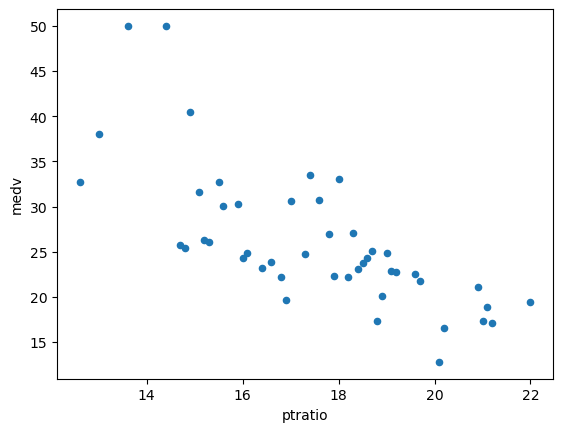

In [40]:
ptratio_vs_medv = boston.groupby("ptratio")["medv"].mean().round(2)
ptratio_vs_medv = ptratio_vs_medv.reset_index()
display(ptratio_vs_medv.plot(kind="scatter", x="ptratio", y="medv"))

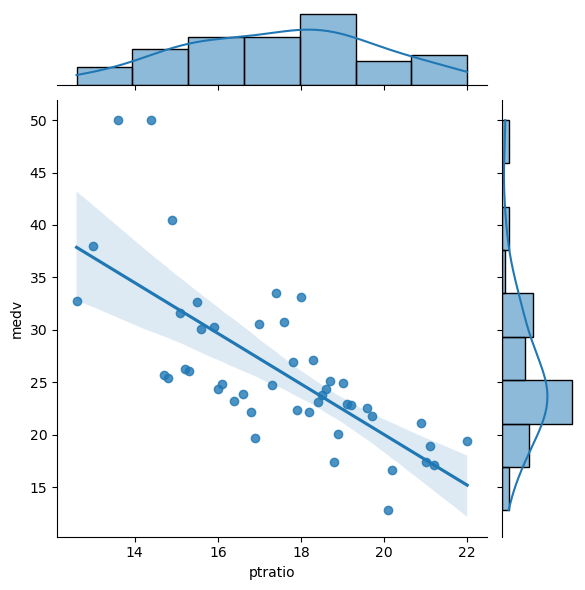

In [41]:
import seaborn as sns
display(sns.jointplot(data=ptratio_vs_medv, x="ptratio", y="medv", kind="reg"))

#### Esercizio 6:
Abbiamo un DataFrame di dipendenti e un DataFrame di dipartimenti.

In [42]:
employees_df = pd.DataFrame({'employee_id': [101, 102, 103, 104, 105], 
                             'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 
                             'department_id': [1, 2, 1, 2, 3] })

departments_df = pd.DataFrame({'department_id': [1, 2, 3], 
                               'department_name': ['HR', 'IT', 'Finance'], 
                               'location': ['New York', 'San Francisco', 'Chicago'] })

display(employees_df)
display(departments_df)

,employee_id,name,department_id
0,101,Alice,1
1,102,Bob,2
2,103,Charlie,1
3,104,David,2
4,105,Emma,3


,department_id,department_name,location
0,1,HR,New York
1,2,IT,San Francisco
2,3,Finance,Chicago


* Unire questi DataFrame in base alla colonna comune '*department_id*', in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge().

In [43]:
display(pd.merge(left=employees_df, right=departments_df, on="department_id", how="inner"))

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,102,Bob,2,IT,San Francisco
2,103,Charlie,1,HR,New York
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


* Per ogni DataFrame, trasformare la colonna '*department_id*' nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join().
  * **.set_index()**: utilizzato per modificare l'indice del DataFrame. Dopo aver impostato una determinata colonna come indice, il DataFrame avrà quella colonna come colonna di indice -> è utile per organizzare i dati in modo più chiaro e per accedere ai dati utilizzando l'indice.                                                                                                                    
    La colonna selezionata diventa un metadato, non è più un semplice dato.

In [44]:
employees_df = employees_df.set_index("department_id")
departments_df = departments_df.set_index("department_id")

display(employees_df.join(departments_df, how="inner"))

,employee_id,name,department_name,location
department_id,,,,
1,101,Alice,HR,New York
2,102,Bob,IT,San Francisco
1,103,Charlie,HR,New York
2,104,David,IT,San Francisco
3,105,Emma,Finance,Chicago


* Ci sono differenze nel risultato? Quali? Perché?
  * Il risultato è molto simile, l'unica differenza sta nella colonna '***department_id***'.                                             
    Con il merge (che lavora con le colonne in comune tra due tabelle), risulta una colonna contenente dati (come tutte le altre) e come indici di posione abbiamo quelli standard; con il join (che lavora con gli indici in comune tra due tabelle) ed il metodo *.set_index()*, risulta come colonna indice del DataFrame.                                                                               
    Con il join, è strettamente necessario impostare la colonna comune come indice (quindi rispetto al merge, dobbiamo fare due operazioni in più, altrimenti non possiamo unire le due tabelle).

#### Esercizio 7:
* Dal database '*AdventureWorksDW*' importiamo le tabelle '*dimemployee*' e '*dimemployeesalesterritory*' come DataFrame.

In [45]:
%run "connessione_DB_AdventureWorks.ipynb"

DB name è uguale a AdventureWorksDW
Sono collegata al DB!


In [46]:
query_dimemployee = """SELECT * FROM dimemployee"""
dimemployee = pd.read_sql(query_dimemployee, db_engine)
query_dimsalempter = """SELECT * FROM dimemployeesalesterritory"""   
dimsalempter = pd.read_sql(query_dimsalempter, db_engine)

display(dimemployee.head(2))
display(dimsalempter.head(2))

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None


,EmployeeKey,SalesTerritoryKey
0,272,1
1,277,1


* Effettuiamo un join tra i due DataFrame usando le colonne '*EmployeeKey*'.

In [47]:
#Eseguo join interna tra 'dimemployee' e 'dimsalempterr' sulla colonna 'EmployeeKey'
salempter_merge = pd.merge(left=dimemployee, right=dimsalempter, on="EmployeeKey", how="inner")

#Visualizzo risultato della join
display(salempter_merge.head(3))

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1
1,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,2
2,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,3


* Controlliamo la dimensione del DataFrame risultante: è quella attesa?
  * Si, perchè ho utilizzato un **inner join** -> dovendo collegare i dipendenti con i territori di vendita (tramite gli '*EmployeeKey*', risalgo ai '*SalesTerritoryKey*' corrispondenti), presumibilmente mi interessano solo i dipendenti che sono anche venditori.
  * Nella tabella di '*dimemployee*' ci sono tutti i dipendenti, ma non tutti sono dei venditori. Se facessi una left join, otterrei tutti i dipendenti, ma non tutti avranno un territorio di vendita, perché appunto non sono venditori.
  * La tabella '*dimemployeesalesterritory*' è invece una tabella intermedia (di associazione) con la tabella '*dimsalesterritory*', da dove si può risalire ai territori di vendita, tramite un altro merge (punto dell'esercizio successivo).

In [48]:
#Dimensioni DataFrame 'dimemployee' (dipendenti, in parte venditori)
print("dimemployee shape:", dimemployee.shape)     

#Dimensioni DataFrame 'dimsalempter' (tabella intermedia con FK delle PK delle due tabelle che collega)
print("dimsalempterr shape:", dimsalempter.shape) 

#Dimensioni DataFrame 'salempter_merge', risultante dopo il merge
print("merge shape:", salempter_merge.shape)       

dimemployee shape: (296, 28)
dimsalempterr shape: (39, 2)
merge shape: (39, 29)


* Importiamo ora la tabella '*dimsalesterritory*' ed effettuiamo un join tra questa e il DataFrame risultante della join precedente, usando le colonne '*SalesTerritoryKey*'.

In [49]:
query_dimsalesterritory = """SELECT * FROM dimsalesterritory"""
dimsalesterritory = pd.read_sql(query_dimsalesterritory, db_engine)
display(dimsalesterritory.head(3))

dimsalempter_merge = pd.merge(left=salempter_merge, right=dimsalesterritory, on="SalesTerritoryKey", how="inner")
display(dimsalempter_merge.head(3))

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [50]:
print(dimsalempter_merge.columns.tolist())  #Mostro elenco colonne presenti nel DataFrame creato con il merge

['EmployeeKey', 'ParentEmployeeKey', 'EmployeeNationalIDAlternateKey', 'ParentEmployeeNationalIDAlternateKey', 'FirstName', 'LastName', 'MiddleName', 'NameStyle', 'Title', 'HireDate', 'BirthDate', 'LoginID', 'EmailAddress', 'Phone', 'MaritalStatus', 'EmergencyContactName', 'EmergencyContactPhone', 'SalariedFlag', 'Gender', 'PayFrequency', 'BaseRate', 'VacationHours', 'SickLeaveHours', 'CurrentFlag', 'SalesPersonFlag', 'DepartmentName', 'EmployeePhoto', 'Position', 'SalesTerritoryKey', 'SalesTerritoryAlternateKey', 'SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryGroup', 'SalesTerritoryImage']


> * Controlliamo la dimensione del DataFrame risultante: è quella attesa?
    * Si, utilizzando un **inner join**, unisco le due tabelle solo dove c'è corrispondenza. Dal risultato ottenuto, si evidenzia che alcuni dipendenti venditori (39 in totale), lavorano nello stesso territorio (11 in totale).

In [51]:
print("dimemployee shape:", dimsalesterritory.shape)  #Dimensioni DataFrame dimsalesterritory (territori di vendite)
print("dimsalempterr shape:", salempter_merge.shape)  #Dimensioni DataFrame salempter_merge, risultante dopo il primo merge
print("merge shape:", dimsalempter_merge.shape)       #Dimensioni DataFrame dimsalempter_merge, risultante dopo il secondo merge

dimemployee shape: (11, 6)
dimsalempterr shape: (39, 29)
merge shape: (39, 34)


* Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region).

In [52]:
display(dimsalempter_merge.groupby(["SalesTerritoryCountry", "SalesTerritoryRegion"]).size().to_frame())

0
SalesTerritoryCountry SalesTerritoryRegion   
Australia             Australia             3
Canada                Canada                4
France                France                4
Germany               Germany               3
United Kingdom        United Kingdom        3
United States         Central               5
                      Northeast             3
                      Northwest             5
                      Southeast             4
                      Southwest             5

* Valutiamo la media del '*BaseRate*' per ogni paese: ci sono differenze?
  * La paga base è maggiore per '*Australia*', '*Germania*' e '*UK*' (sono identiche), nettamente inferiore per gli '*Stati Uniti*', mentre per '*Francia*' e '*Germania*' (sono identiche) sono leggermente più alte degli '*Stati Uniti*'.

In [53]:
display(dimsalempter_merge.groupby("SalesTerritoryCountry")["BaseRate"].mean().round(2).to_frame())

,BaseRate
SalesTerritoryCountry,
Australia,47.76
Canada,41.59
France,41.59
Germany,47.76
United Kingdom,47.76
United States,39.91
